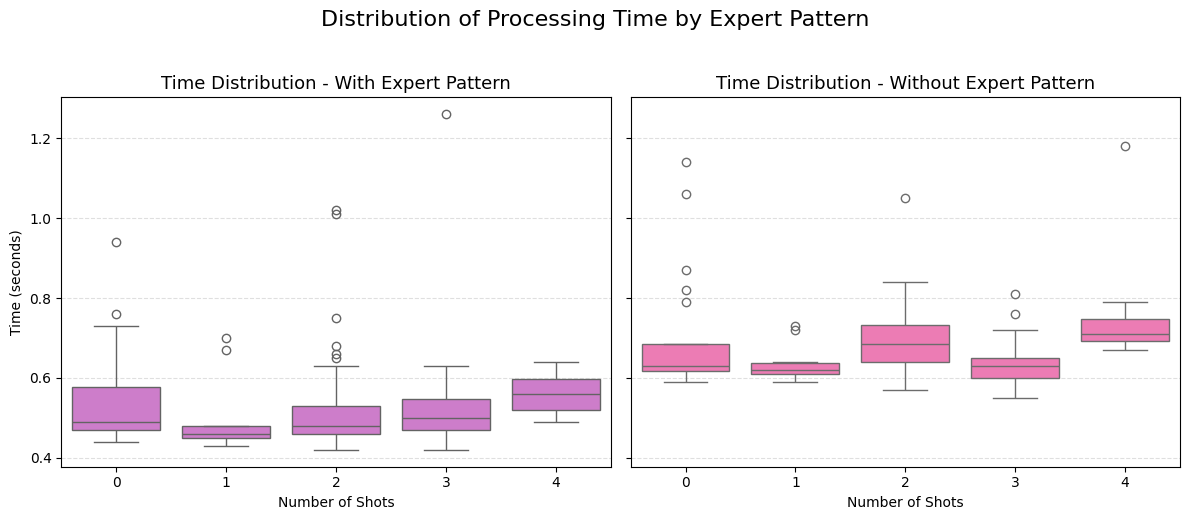

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("results.csv")
df["Expert Pattern"] = df["expert_pattern"].map({0: "Without Expert Pattern", 1: "With Expert Pattern"})

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

patterns = ["With Expert Pattern", "Without Expert Pattern"]
colors = ["#DA70D6", "#FF69B4"]

for ax, pattern, color in zip(axes, patterns, colors):
    sns.boxplot(
        data=df[df["Expert Pattern"] == pattern],
        x="nr_of_shots",
        y="time",
        color=color,
        ax=ax
    )
    ax.set_title(f"Time Distribution - {pattern}", fontsize=13)
    ax.set_xlabel("Number of Shots")
    ax.set_ylabel("Time (seconds)" if pattern == "With Expert Pattern" else "")
    ax.grid(True, axis='y', linestyle='--', alpha=0.4)

plt.suptitle("Distribution of Processing Time by Expert Pattern", fontsize=16, y=1.03)
plt.tight_layout()
plt.show()


In [ ]:
def create_prompt(course_name: str, course_content: str, nr_of_shots:int, with_expert_pattern:bool):
    prompt_shots = []
    for idx in range(1,nr_of_shots+1):
        with open(f'prompts/shot_{idx}.txt','r') as file:
            prompt_shots.append(file.read())
    persona_pattern = prompt_persona_pattern if with_expert_pattern else ""
    return persona_pattern + prompt_instructions + "\n".join(prompt_shots) + prompt_template.replace("<course_name>", course_name).replace("<course_content>", course_content)

In [12]:
from google import genai

with open('gemini_key.txt', 'r') as f:
    client = genai.Client(api_key=f.readline())

response = client.models.generate_content(
							model="gemini-2.5-flash-preview-04-17",
							contents="Hi",
				)
